In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/DL_ML_AiQuest_PacticeWork/class_practice_project/Datasets/cancer dataset.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(['id', 'Unnamed: 32'], axis='columns', inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 31)

<Axes: xlabel='diagnosis', ylabel='count'>

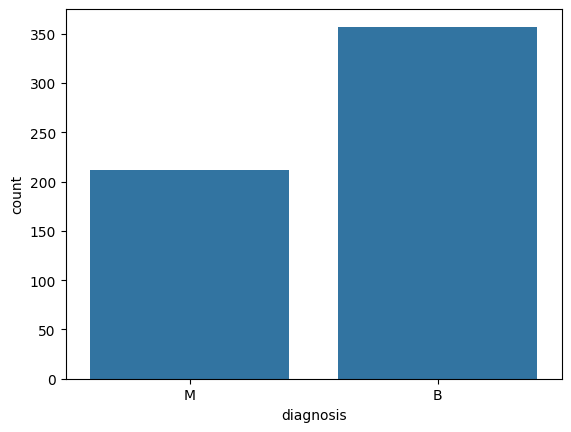

In [8]:
sns.countplot(x='diagnosis', data=df)

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

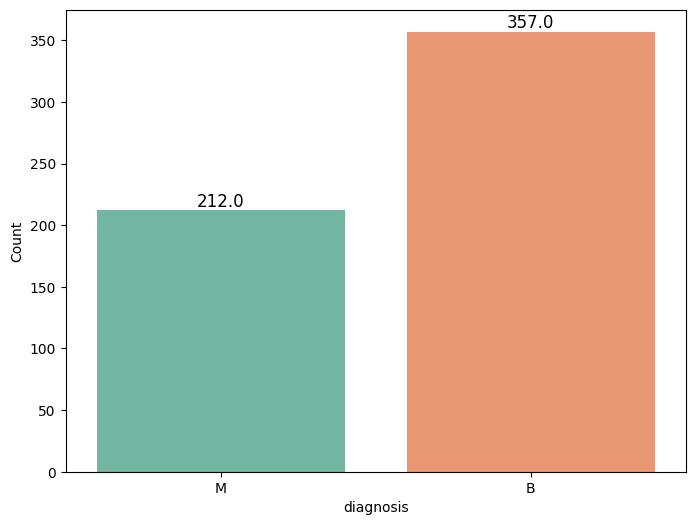

In [10]:
#Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

#Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

 
plt.ylabel("Count")
plt.show()

In [11]:
x = df.drop('diagnosis', axis='columns')

In [12]:
y = df['diagnosis']

<h1>Train Test Split</h1>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
y_test.shape

(171,)

In [15]:
X_test.shape

(171, 30)

<h1>Test and Validation</h1>

In [16]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [17]:
X_test.shape

(85, 30)

In [18]:
X_val.shape

(86, 30)

<h1>Step 3: Decision Tree and Evaluation</h1>

In [19]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [20]:
y_pred_dt = dt_model.predict(X_test)

In [21]:
y_pred_dt

array(['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M'], dtype=object)

In [22]:
print("Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt), "\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance
Accuracy: 0.9411764705882353 

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.92      0.95        48
           M       0.90      0.97      0.94        37

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



<h1>Random Forest Model and Evaluation</h1>

In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [24]:
y_pred_rf

array(['M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [25]:
print("Random Forest Performance")
print("Accuracy", accuracy_score(y_test, y_pred_rf), "\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
Accuracy 0.9647058823529412 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        48
           M       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



<h1>Pre-Pruning for cost complexity</h1>
<h2>Initialized Hyperparameters</h2>

In [26]:
#define hyperparameters for decision trees
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12, 15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [27]:
#Perform Grid Search for decision trees
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dt_params, cv=5)

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25,
                                       28],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [28]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.0118629 , 0.001017  , 0.00731039, ..., 0.00477614, 0.00763483,
        0.00172386]),
 'std_fit_time': array([0.00306324, 0.00155748, 0.00529813, ..., 0.00427569, 0.0005765 ,
        0.00344772]),
 'mean_score_time': array([0.00419641, 0.00182719, 0.00156312, ..., 0.        , 0.00041533,
        0.00314074]),
 'std_score_time': array([0.00311336, 0.00257051, 0.00129216, ..., 0.        , 0.00083065,
        0.00385006]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
              mask=[False, False, False, ..

In [29]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011863,0.003063,0.004196,0.003113,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
1,0.001017,0.001557,0.001827,0.002571,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,334
2,0.007310,0.005298,0.001563,0.001292,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
3,0.002674,0.002511,0.002517,0.003290,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,46
4,0.006985,0.006060,0.003345,0.004778,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,1381


In [30]:
tuning_result_dt_gs.shape

(1980, 18)

In [31]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [32]:
tuning_result_dt_gs.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_splitter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [33]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1275,0.003623,0.005092,0.000000,0.000000,entropy,6,1,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9500,0.9375,0.949367,0.936709,0.942215,0.006108,1
1293,0.001754,0.003508,0.000000,0.000000,entropy,6,2,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9375,0.9500,0.949367,0.936709,0.942215,0.006108,1
1190,0.016835,0.002986,0.002132,0.002729,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1202,0.007099,0.003497,0.000968,0.001936,entropy,4,2,9,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1200,0.007266,0.007499,0.002027,0.004053,entropy,4,2,8,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3


<h1>Evaluate the Optimized Decision Tree Model</h1>

In [34]:
#Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(X_test)
print("Decision Tree grid search performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt_gs))

Decision Tree grid search performance
Accuracy: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.98      0.95        48
           M       0.97      0.89      0.93        37

    accuracy                           0.94        85
   macro avg       0.95      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



<h2>Grid Search(Hyperparameter Optimization Technique for Random Forest</h2>

In [35]:
"""rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)"""

'rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)\nrf_grid_search.fit(X_train, y_train)'

<h5>I can't do rest of Grid Search for Random Forest due to time complexity</h5>

<h1>Hyperparameter optimization using Randomized Search for Decision Tree</h1>

In [36]:
#Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_distributions=dt_params, n_iter=100, cv=5, random_state=42)

In [37]:
dt_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      15, 20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [38]:
dt_random_search.cv_results_

{'mean_fit_time': array([1.41808987e-02, 5.67851067e-03, 2.76226997e-03, 3.64980698e-03,
        7.32898712e-03, 5.02395630e-03, 6.30731583e-03, 3.40862274e-03,
        2.59513855e-03, 3.91373634e-03, 5.39183617e-03, 3.20234299e-03,
        1.77278519e-03, 5.29327393e-03, 8.40954781e-03, 1.19972706e-02,
        7.84382820e-03, 2.39887238e-03, 6.88672066e-03, 6.59174919e-03,
        7.62591362e-03, 2.82917023e-03, 3.93176079e-03, 3.20181847e-03,
        8.60109329e-03, 3.00641060e-03, 1.65410042e-03, 1.10769272e-04,
        5.91402054e-03, 5.31468391e-03, 1.02710724e-04, 7.06315041e-03,
        1.65972710e-03, 9.90467072e-03, 3.51171494e-03, 3.46765518e-03,
        3.82046700e-03, 1.15690231e-03, 7.82890320e-03, 5.02290726e-03,
        2.56853104e-03, 4.88777161e-03, 7.18216896e-03, 4.68058586e-03,
        2.84080505e-03, 8.56866837e-03, 3.24630737e-03, 6.95781708e-03,
        6.99152946e-03, 4.17208672e-03, 9.37423706e-03, 8.81967545e-03,
        2.31976509e-03, 3.51786613e-03, 6.15077

In [39]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014181,0.005088,0.004463,0.001459,best,5,5,8,entropy,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,25
1,0.005679,0.004066,0.002837,0.002381,best,3,4,None,gini,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9125,0.9250,0.949367,0.924051,0.932184,0.014953,20
2,0.002762,0.004002,0.000948,0.001171,random,6,5,6,gini,"{'splitter': 'random', 'min_samples_split': 6,...",0.9250,0.8750,0.9500,0.936709,0.860759,0.909494,0.035176,83
3,0.003650,0.002046,0.002862,0.002993,random,5,4,15,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,33
4,0.007329,0.003184,0.003271,0.003267,best,3,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,6


In [40]:
dt_random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'entropy'}

<h1>Evaluate the optimized models for Randomized Search in Decision Tree</h1>

In [41]:
y_pred_dt_rs = dt_random_search.predict(X_test)
y_pred_dt_rs

array(['M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [42]:
print("Decision Tree Randomized Search Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_rs))
print("Classification Report")
print(classification_report(y_test, y_pred_dt_rs))

Decision Tree Randomized Search Performance
Accuracy: 0.9411764705882353
Classification Report
              precision    recall  f1-score   support

           B       0.98      0.92      0.95        48
           M       0.90      0.97      0.94        37

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



<h1>Perform Randomized Search for Random Forest</h1>

In [43]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=rf_params, n_iter=100, cv=5, random_state=42)

In [44]:
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 10],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [45]:
rf_random_search.cv_results_

{'mean_fit_time': array([0.55868931, 0.64911933, 0.54871526, 0.27540402, 0.30529613,
        0.18517604, 0.52184935, 0.46027737, 0.41145625, 0.37215047,
        0.27670283, 0.45403357, 0.29841042, 0.45762148, 0.17784848,
        0.19280925, 0.5026855 , 0.20779548, 0.18770308, 0.19358692,
        0.5715188 , 0.2024229 , 0.60308361, 0.17466035, 0.51131911,
        0.17244515, 0.40120516, 0.27833695, 0.56363111, 0.27839961,
        0.24828987, 0.45730033, 0.37877727, 0.56416664, 0.23220434,
        0.26408796, 0.36559067, 0.48347015, 0.47854481, 0.381251  ,
        0.37851152, 0.36242995, 0.55680323, 0.56413002, 0.18407841,
        0.18729305, 0.17672133, 0.28318443, 0.32130966, 0.56751776,
        0.40615911, 0.30468178, 0.49354401, 0.35291224, 0.39890919,
        0.25757976, 0.25714808, 0.20320916, 0.60861053, 0.2705657 ,
        0.5506125 , 0.28134084, 0.57032666, 0.34930825, 0.36596184,
        0.5686614 , 0.36985474, 0.33074198, 0.39952269, 0.17591166,
        0.15806732, 0.60682096,

In [46]:
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.558689,0.068640,0.029465,0.002816,251,10,1,log2,4,gini,"{'n_estimators': 251, 'min_samples_split': 10,...",0.9375,0.9500,0.9625,0.936709,0.924051,0.942152,0.013073,88
1,0.649119,0.042446,0.028449,0.006533,301,6,2,log2,28,entropy,"{'n_estimators': 301, 'min_samples_split': 6, ...",0.9625,0.9500,0.9625,0.949367,0.936709,0.952215,0.009644,32
2,0.548715,0.028925,0.021883,0.005346,201,6,1,auto,10,entropy,"{'n_estimators': 201, 'min_samples_split': 6, ...",0.9750,0.9500,0.9750,0.936709,0.949367,0.957215,0.015276,10
3,0.275404,0.053991,0.012710,0.007911,151,8,3,auto,2,entropy,"{'n_estimators': 151, 'min_samples_split': 8, ...",0.9250,0.9125,0.9250,0.936709,0.924051,0.924652,0.007663,100
4,0.305296,0.013281,0.015868,0.006088,151,3,2,auto,28,entropy,"{'n_estimators': 151, 'min_samples_split': 3, ...",0.9750,0.9500,0.9625,0.936709,0.936709,0.952184,0.014904,36


In [47]:
rf_random_search.best_params_

{'n_estimators': 101,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

<h1>Evaluate the optimized model for RandomizedSearch for Random Forest</h1>

In [48]:
y_pred_rf_rs = rf_random_search.predict(X_test)
y_pred_rf_rs

array(['M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [49]:
print("Random Forest Randomized Search Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rs))
print("Classification Report")
print(classification_report(y_test, y_pred_rf_rs))

Random Forest Randomized Search Performance
Accuracy: 0.9647058823529412
Classification Report
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        48
           M       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



<h1>Post Pruning for Decision Tree</h1>

In [50]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, random_state=42, splitter='random')

[Text(0.4431818181818182, 0.9444444444444444, 'concave points_mean <= 0.04\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.18181818181818182, 0.8333333333333334, 'radius_worst <= 17.727\nentropy = 0.248\nsamples = 218\nvalue = [209, 9]'),
 Text(0.13636363636363635, 0.7222222222222222, 'concave points_mean <= 0.02\nentropy = 0.161\nsamples = 213\nvalue = [208, 5]'),
 Text(0.09090909090909091, 0.6111111111111112, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'radius_se <= 0.623\nentropy = 0.255\nsamples = 117\nvalue = [112, 5]'),
 Text(0.13636363636363635, 0.5, 'perimeter_mean <= 79.994\nentropy = 0.176\nsamples = 114\nvalue = [111, 3]'),
 Text(0.09090909090909091, 0.3888888888888889, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.18181818181818182, 0.3888888888888889, 'compactness_se <= 0.013\nentropy = 0.28\nsamples = 62\nvalue = [59, 3]'),
 Text(0.13636363636363635, 0.2777777777777778, 'concavity_worst <= 0.214

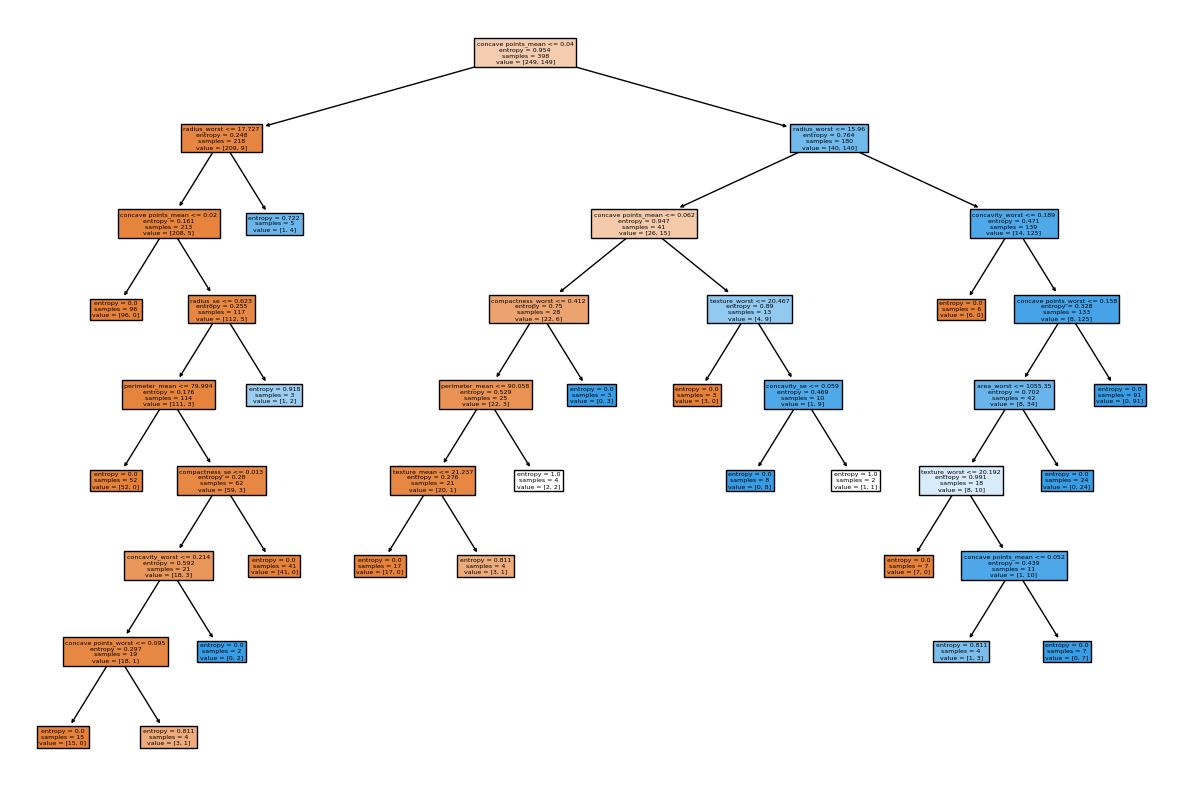

In [51]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_clf, filled=True, feature_names=x.columns)

In [52]:
pruning_path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha_values = pruning_path.ccp_alphas

In [53]:
ccp_alpha_values

array([0.        , 0.00399335, 0.00604739, 0.00641958, 0.00675868,
       0.00862793, 0.01202884, 0.01435018, 0.0173026 , 0.01763119,
       0.03099137, 0.03549229, 0.04094249, 0.05496803, 0.08343007,
       0.47242814])

In [54]:
# save models with diffrent ccp_alpha value
clfs_list = []
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

In [55]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.003993352659045518, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006047387516658223, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006419576589874848, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006758683256012092, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00862793379793314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012028844403926979, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014350184435176862, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.017302601474775314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01763119048807507, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.030991367208617764, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03549229443392196, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.04094249107720667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.05496803084950469, random_state=42),
 

In [56]:
train_scores = [clf.score(X_train, y_train) for clf in clfs_list]
test_scores = [clf.score(X_test, y_test) for clf in clfs_list]

In [57]:
train_scores

[1.0,
 0.992462311557789,
 0.9899497487437185,
 0.9874371859296482,
 0.9874371859296482,
 0.9824120603015075,
 0.9698492462311558,
 0.9698492462311558,
 0.9422110552763819,
 0.9422110552763819,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [58]:
test_scores

[0.9411764705882353,
 0.9647058823529412,
 0.9764705882352941,
 0.9764705882352941,
 0.9764705882352941,
 0.9764705882352941,
 0.9647058823529412,
 0.9647058823529412,
 0.9176470588235294,
 0.9176470588235294,
 0.9176470588235294,
 0.9176470588235294,
 0.9176470588235294,
 0.9176470588235294,
 0.9176470588235294,
 0.5647058823529412]

In [59]:
import matplotlib.pyplot as plt

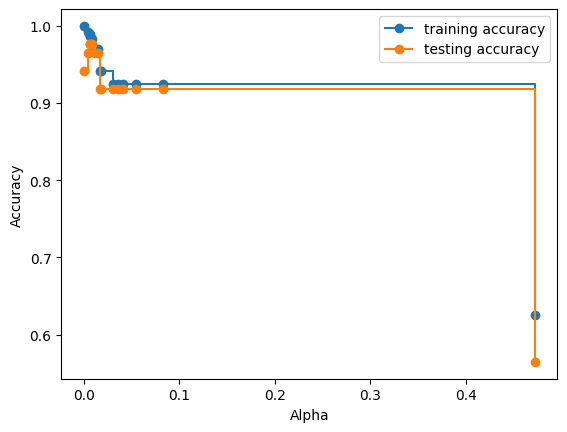

In [60]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label='testing accuracy', drawstyle='steps-post')

plt.legend()
plt.show()

In [61]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [62]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9764705882352941

In [63]:
#Training Score
clf.score(X_train, y_train)

0.9824120603015075

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

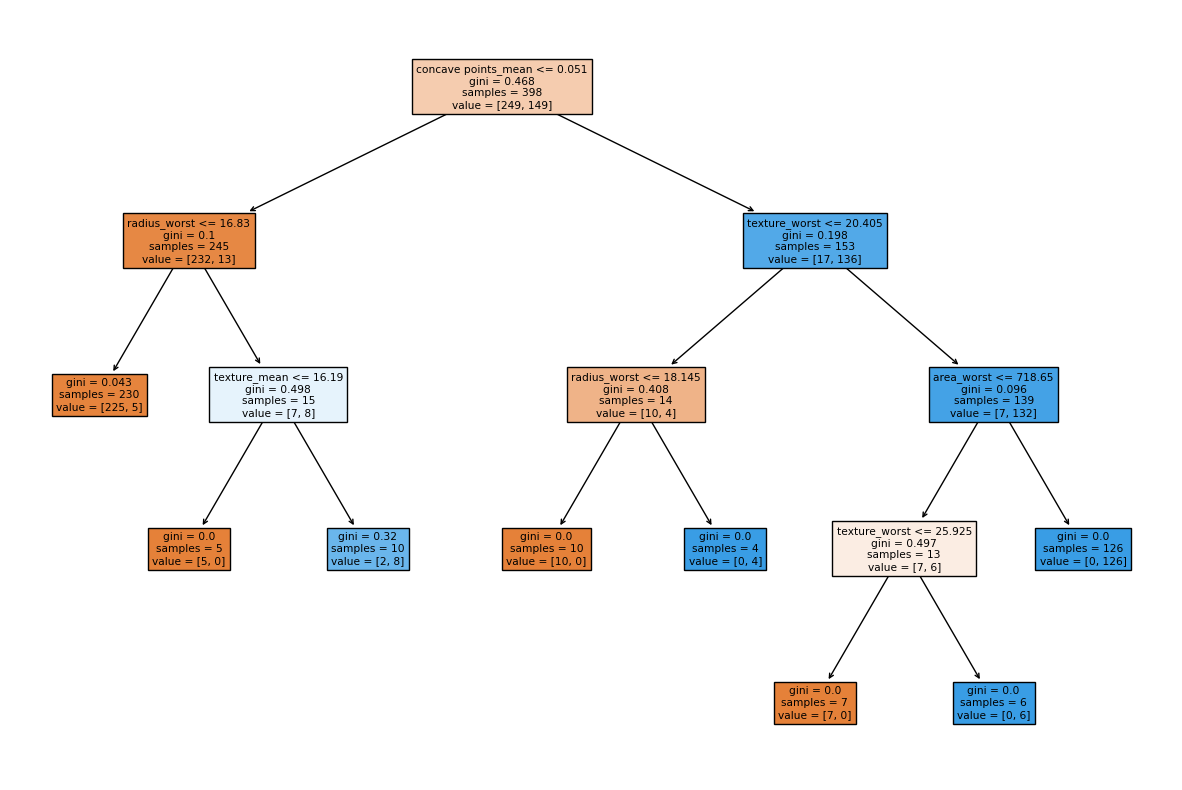

In [64]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=x.columns)